In [1]:
import ijson
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import numpy as np
import os, sys, stat, time
import subprocess
from ast import literal_eval
import re
import thread
import threading

import csv
def saveDict2File(aDict, filename):
    w = csv.writer(open(filename, "w"))
    for key, val in aDict.items():
        w.writerow([key, val])

def readFile2Dict(filename):
    dict = {}
    for key, val in csv.reader(open(filename)):
        dict[key] = eval(val)
    return dict

HOME = os.getcwd()#'/Users/anilkoyuncu/Documents/lexar/'
if __name__ == '__main__':
    
    print(time.ctime(time.time()))
    os.chdir(HOME)
    
    t1 = readFile2Dict('dataset/type1-mutations.csv')
    t2 = readFile2Dict('dataset/type2-mutations.csv')
    t3 = readFile2Dict('dataset/type3-mutations.csv')

Wed Mar 22 16:32:40 2017


In [8]:
def countOps(t):
    aDict = dict()
    for commit, op in t.items():

        countSum = 0
        for oper, count in op.items():
            if 'NotParsedCorrectly' in oper:
                continue
                #print oper
            else:
                countSum = countSum + count
        key = commit.split(':')[0]
        if aDict.has_key(key):
            tmp = aDict[key]
            aDict[key] = tmp + countSum
        else:
            aDict[key] = countSum
    return aDict
    
    



t1counts = countOps(t1)
t2counts = countOps(t2)
t3counts = countOps(t3)

In [9]:
def getOperations(t):
    aDict = dict()
    for commit, op in t.items():

        
        key = commit.split(':')[0]
        #print key
        for oper, count in op.items():
            for i in range(count):
                #print oper
                match = re.search('NotParsedCorrectly', oper)
                if not match:
                    if aDict.has_key(key):
                        tmp = aDict[key]
                        tmp.append(oper)
                        aDict[key] = tmp
                    else:
                        opL = list()
                        opL.append(oper)
                        #print opL
                        aDict[key] = opL
                        #print aDict
        #print aDict
    return aDict

t1Ops = getOperations(t1)
t2Ops = getOperations(t2)
t3Ops = getOperations(t3)

def calcUniqOps(t):
    aDict = dict()
    for k,v in t.items():
        if not 'NotParsedCorrectly' in v:
            aDict[k] = list(set(v))
    return aDict
            
        

t1Uniq = calcUniqOps(t1Ops)
t2Uniq = calcUniqOps(t2Ops)
t3Uniq = calcUniqOps(t3Ops)

In [10]:
t1Counts = t1counts.values()
t2Counts = t2counts.values()
t3Counts = t3counts.values()

In [ ]:
t1Counts.sort()
t2Counts.sort()
t3Counts.sort()

In [32]:
def plotFigure(x,y, tip=False):
    [x1,x2,x3] = x
    [y1,y2,y3] = y
    plt.figure()
    f, axe = plt.subplots(1, figsize=(10,5))#plt.subplot(111)
    axe.plot(x1,y1,color='b',label='Automated Patches' ,linewidth= 5)
    plt.plot(x2,y2, color='y',label='Semi-manual Patches',linewidth= 5)
    plt.plot(x3,y3, color='r',label='Manual Patches',linewidth= 5)


    axe.set_xscale('log')

    plt.xlabel('# Operations', fontsize=20)
    plt.ylabel('# commits', fontsize=20)
        #plt.title("Temporal dist. of commits", fontsize=18)
    plt.tick_params(labelsize=16)
    plt.legend(bbox_to_anchor=(0.25, 1), loc=0, borderaxespad=0., fontsize=20)
    plt.subplots_adjust(left=0.06,bottom=0.15,right=0.98, top=0.95 , wspace= 0.1, hspace=0)
    plt.ion()
    fig = plt.gcf()
    fig.set_size_inches(20,10, forward=True)
    plt.savefig(tip +"OperationCommit.pdf",dpi=100)
    

In [11]:
t1All = pd.DataFrame.from_dict(t1counts.items())



t1All.columns = ['commit', 'operatorCount']

dfT1Uniq = pd.DataFrame.from_dict(t1Uniq.items())

dfT1Uniq.columns = ['commit', 'uniq']

dfT1Merge = pd.merge(dfT1Uniq,t1All,on='commit')

t2All = pd.DataFrame.from_dict(t2counts.items())



t2All.columns = ['commit', 'operatorCount']

dfT2Uniq = pd.DataFrame.from_dict(t2Uniq.items())

dfT2Uniq.columns = ['commit', 'uniq']

dfT2Merge = pd.merge(dfT2Uniq,t2All,on='commit')

t3All = pd.DataFrame.from_dict(t3counts.items())



t3All.columns = ['commit', 'operatorCount']

dfT3Uniq = pd.DataFrame.from_dict(t3Uniq.items())

dfT3Uniq.columns = ['commit', 'uniq']

dfT3Merge = pd.merge(dfT3Uniq,t3All,on='commit')

In [16]:
df1 = df[df.type == 1.0]
df2 = df[df.type == 2.0]
df3 = df[df.type == 3.0]

In [17]:
def getUniqCount(x):
    return len(x)

dfT3Merge['uniqCount'] = dfT3Merge.uniq.apply(getUniqCount)
dfT2Merge['uniqCount'] = dfT2Merge.uniq.apply(getUniqCount)
dfT1Merge['uniqCount'] = dfT1Merge.uniq.apply(getUniqCount)

#dfT3Merge[['operatorCount','uniqCount']]

In [18]:
dfT1M = pd.merge(df1,dfT1Merge,on='commit')
dfT2M = pd.merge(df2,dfT2Merge,on='commit')
dfT3M = pd.merge(df3,dfT3Merge,on='commit')

In [19]:
hT1 = dfT1M[dfT1M.hunks == 1.0]
hT2 = dfT2M[dfT2M.hunks == 1.0]
hT3 = dfT3M[dfT3M.hunks == 1.0]

In [20]:
fT1 = dfT1M[dfT1M.fileN == 1.0]
fT2 = dfT2M[dfT2M.fileN == 1.0]
fT3 = dfT3M[dfT3M.fileN == 1.0]

In [288]:
exportHT1 = hT1.uniqCount.value_counts()
exportHT2 = hT2.uniqCount.value_counts()
exportHT3 = hT3.uniqCount.value_counts()

exportHT1.to_csv('T1-hunk-uniq.csv')
exportHT2.to_csv('T2-hunk-uniq.csv')
exportHT3.to_csv('T3-hunk-uniq.csv')

In [280]:
exportFT1 = fT1.uniqCount.value_counts()
exportFT2 = fT2.uniqCount.value_counts()
exportFT3 = fT3.uniqCount.value_counts()

exportFT1.to_csv('T1-file-uniq.csv')
exportFT2.to_csv('T2-file-uniq.csv')
exportFT3.to_csv('T3-file-uniq.csv')

In [307]:
ft1x = hT1.operatorCount.unique().tolist() +hT2.operatorCount.unique().tolist() + hT3.operatorCount.unique().tolist()

In [28]:

def plotBoxPlot(y1, y2,y3, outlier, label, fn):

    y = [y1,y2,y3]
    
    
    c1 = pd.DataFrame(y1,columns=['# of change operations'])
    c1['type'] = 'H'
    c2 = pd.DataFrame(y2,columns=['# of change operations'])
    c2['type'] = 'DLH'
    c3 = pd.DataFrame(y3,columns=['# of change operations'])
    c3['type'] = 'HMG'


    frames = [c1, c2, c3]

    result = pd.concat(frames)

    result.to_csv('issta_'+fn+'.csv')
    
    
    fig = plt.figure()
    #ax1 = plt.subplot2grid((1,1),(0,0))
    ax1 = fig.add_subplot(111)
    
    #ax1.plot(x1,y1,'b-', color='b',label=typ)
    if outlier == True:
        bp =ax1.boxplot(y, 0, 'rs', 0, 2,patch_artist = True)
        
        for box in bp['boxes']:
            # change outline color
            box.set((2, 0.85),linewidth=4)
    else:
        bp = ax1.boxplot(y, 0, '', 0, 2, patch_artist = True)
        for box in bp['boxes']:
            # change outline color
            box.set(linewidth=4)
            print box
            
            ## change color and linewidth of the medians
        for median in bp['medians']:
            median.set(linewidth=4)
        for whisker in bp['whiskers']:
            whisker.set(linewidth=4)

        ## change color and linewidth of the caps
        for cap in bp['caps']:
            cap.set(linewidth=4)
        

    
    #ax1.grid(True)#, color='g' , linestyle ='-')
    varLabels = ['HMG \n Patches', 'DLH \n Patches', 'H \n Patches']
    ax1.set_yticks([0,0.5,1])
    ax1.set_yticklabels(varLabels)#, rotation=45)
    #if outlier == True:
    #    ax1.set_xticklabels(np.arange(-200,700,5), rotation='vertical')
    
    #    ax1.set_xticks(np.arange(-200,700,5))
    #
    #ax1.set_ylim(0,1)
    plt.xlabel(label,fontsize=25)
    #plt.ylabel('Types',fontsize=20)
    #plt.title("Speciality of all developers",fontsize=20)
    plt.tick_params(labelsize=25)
    #ax1.set_xscale('log')
    #plt.subplots_adjust(left=0.09,bottom=0.16,right=1.95, top=0.95 , wspace= 0.2, hspace=0)
    plt.subplots_adjust(left=0.18,bottom=0.15,right=0.98, top=0.95 , wspace= 0.1, hspace=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ion()
    fig = plt.gcf()
    ax1.set_aspect(2)
    fig.set_size_inches(8,4, forward=True)
    plt.savefig(fn + 'Mutation.pdf',dpi=100)
    

In [471]:
import random
from scipy import stats 

y1 = fT2.uniqCount.values
y2 = fT3.uniqCount.values
sampley1 = random.sample(y1, 140)
sampley2 = random.sample(y2, 140)

ranky1 =stats.stats.rankdata(sampley1)
ranky2 =stats.stats.rankdata(sampley2)

stats.ranksums(sampley1, sampley2)  
#stats.wilcoxon(ranky1,ranky2)

RanksumsResult(statistic=-0.080446273226457518, pvalue=0.9358823254196913)

Poly((2, 0.85) ...)
Poly((1, 1.85) ...)
Poly((1, 2.85) ...)


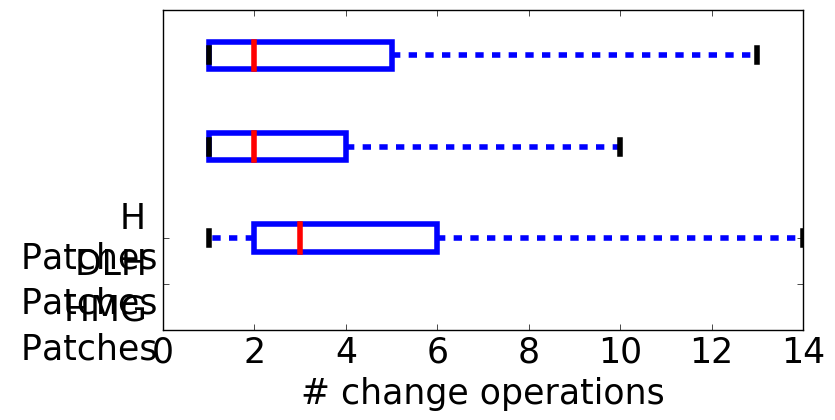

In [29]:
plotBoxPlot(hT1.operatorCount.values,hT2.operatorCount.values,hT3.operatorCount.values,False, '# change operations', 'hunkOps')

Poly((1, 0.85) ...)
Poly((1, 1.85) ...)
Poly((1, 2.85) ...)


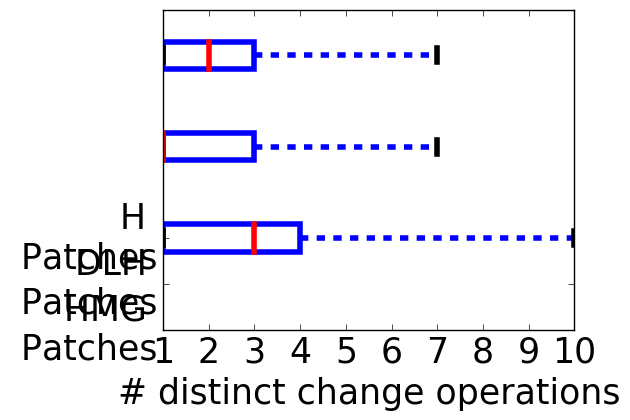

In [30]:
plotBoxPlot(hT1.uniqCount.values,hT2.uniqCount.values,hT3.uniqCount.values,False, '# distinct change operations','hunkDist')

Poly((3, 0.85) ...)
Poly((2, 1.85) ...)
Poly((2, 2.85) ...)


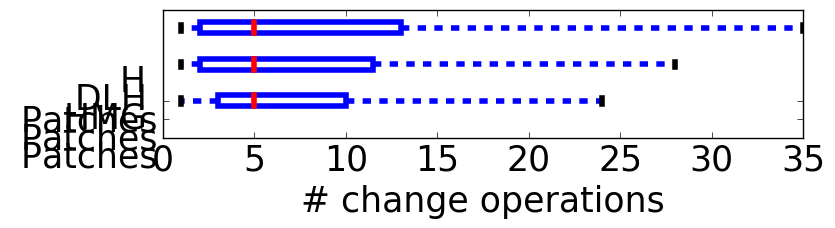

In [31]:
plotBoxPlot(fT1.operatorCount.values,fT2.operatorCount.values,fT3.operatorCount.values,False, '# change operations', 'fileOps')

Poly((2, 0.85) ...)
Poly((1, 1.85) ...)
Poly((1, 2.85) ...)


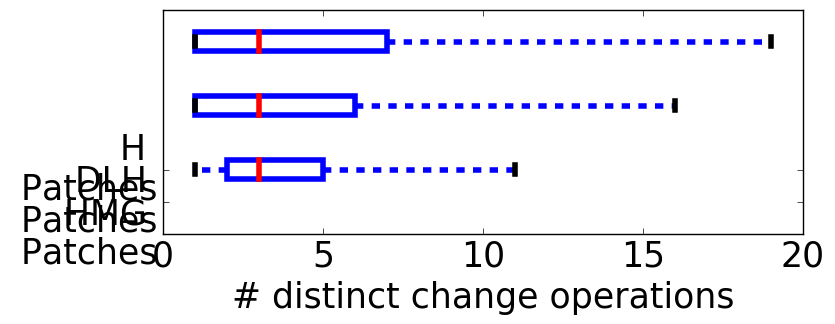

In [32]:
plotBoxPlot(fT1.uniqCount.values,fT2.uniqCount.values,fT3.uniqCount.values,False, '# distinct change operations', 'fileDist')

In [281]:
exportHT1 = hT1.operatorCount.value_counts()
exportHT2 = hT2.operatorCount.value_counts()
exportHT3 = hT3.operatorCount.value_counts()

exportHT1.to_csv('T1-hunk-oper.csv')
exportHT2.to_csv('T2-hunk-oper.csv')
exportHT3.to_csv('T3-hunk-oper.csv')

In [282]:
exportFT1 = fT1.operatorCount.value_counts()
exportFT2 = fT2.operatorCount.value_counts()
exportFT3 = fT3.operatorCount.value_counts()

exportFT1.to_csv('T1-file-oper.csv')
exportFT2.to_csv('T2-file-oper.csv')
exportFT3.to_csv('T3-file-oper.csv')

In [106]:
def calcTopOps(t):
    topOpst = dict()
    for k,v in t.items():
        for op in v:
            if topOpst.has_key(op):
                tmp = topOpst[op]
                tmp = tmp + 1
                topOpst[op] = tmp
            else:
                topOpst[op] = 1
    return topOpst

In [109]:
topT1 = calcTopOps(t1Ops)
topT2 = calcTopOps(t2Ops)
topT3 = calcTopOps(t3Ops)

In [143]:
def calculateAction(t):
    topOpst = dict()
    for k,v in t.items():
        splitted = k.split(':')
        newKey = splitted[0]
        action = splitted[1]
        
        if topOpst.has_key(newKey):
            tmpAction = topOpst[newKey]
            if tmpAction.has_key(action):
                tmp = tmpAction[action]
                tmp = tmp + v
                tmpAction[action] = tmp
                
            else:
                tmpAction[action] = v
            topOpst[newKey] = tmpAction
                
        else:
            aDict = dict()
            aDict[action] = v
            topOpst[newKey] = aDict
    return topOpst

In [150]:
topOp1 = calculateAction(topT1)
topOp2 = calculateAction(topT2)
topOp3 = calculateAction(topT3)

In [151]:
dfTO1 = pd.DataFrame.from_dict(topOp1.items())
dfTO2 = pd.DataFrame.from_dict(topOp2.items())
dfTO3 = pd.DataFrame.from_dict(topOp3.items())

In [153]:
dfTO1.columns = ['operation', 'action']  
dfTO2.columns = ['operation', 'action']    
dfTO3.columns = ['operation', 'action']   

In [168]:
def getCounts(x):
    a = x.values()
    return sum(a)


In [172]:
dfTO1['count'] = dfTO1.action.apply(getCounts)
dfTO2['count'] = dfTO2.action.apply(getCounts)
dfTO3['count'] = dfTO3.action.apply(getCounts)

In [114]:
dfT1 = pd.DataFrame.from_dict(topT1.items())
dfT2 = pd.DataFrame.from_dict(topT2.items())
dfT3 = pd.DataFrame.from_dict(topT3.items())

dfT1.columns = ['mutation', 'count']  
dfT2.columns = ['mutation', 'count']  
dfT3.columns = ['mutation', 'count']  

In [7]:
import csv
def readFile2Dict(filename):
    dict = {}
    for key, val in csv.reader(open(filename)):
        dict[key] = eval(val)
    return dict



In [15]:
#os.chdir('/Users/anilkoyuncu/patchstudy/scripts')
#[hunks, patchSize,fileN]
a= readFile2Dict('dataset/RQ2-compare-locality-a')
b = readFile2Dict('dataset/RQ2-compare-locality-b')
c = readFile2Dict('dataset/RQ2-compare-locality-c')




columns = ['commit', 'operationsSum', 'hunks', 'fileN','type'] 
df = pd.DataFrame(columns=columns) 





ind = 0 
for k,v in a.items():
    if t1counts.has_key(k):
        df.loc[ind] = [k, t1counts[k],v[0],v[2] , 1]
        ind= ind +1





for k,v in b.items():
    if t2counts.has_key(k):
        df.loc[ind] = [k, t2counts[k],v[0],v[2] , 2]
        ind= ind +1





for k,v in c.items():
    if t3counts.has_key(k):
        df.loc[ind] = [k, t3counts[k],v[0],v[2], 3 ]
        ind= ind +1

In [89]:
df1M = pd.merge(df1,commits1,on='commit')
df2M = pd.merge(df2,commits2,on='commit')
df3M = pd.merge(df3,commits3,on='commit')

In [90]:
df1File = df1M[df1M.fileNo == 1.0]
df2File = df2M[df2M.fileNo == 1.0]
df3File = df3M[df3M.fileNo == 1.0]

In [35]:
df1Hunk = df1[df1.hunks == 1.0]
df2Hunk = df2[df2.hunks == 1.0]
df3Hunk = df3[df3.hunks == 1.0]

In [45]:
def prepareAxes(v1,v2,v3 ):
    x1 = v1.values.tolist()
    x2 = v2.values.tolist()
    x3 = v3.values.tolist()

    x1.sort()
    x2.sort()
    x3.sort()

    y1  = list(range(len(x1))) 
    y2  = list(range(len(x2))) 
    y3  = list(range(len(x3)))
    x = [x1,x2,x3]
    y = [y1,y2,y3]
    return x,y

In [70]:
df1Hunk.to_csv('hunkData-type1')
df2Hunk.to_csv('hunkData-type2')
df3Hunk.to_csv('hunkData-type3')

In [76]:
fileType1= 'dataset/t1.json'
fileType2= 'dataset/t2.json'
fileType3= 'dataset/t3.json'

def datasetReader(filename):
    with open(filename, 'r') as f:
        objects = ijson.items(f, 'item')
        rows = list(objects)
    return rows

#os.chdir('/Users/anilkoyuncu/patchstudy/scripts')
ds1 = datasetReader(fileType1)
ds2 = datasetReader(fileType2)
ds3 = datasetReader(fileType3)
commits1 = pd.DataFrame.from_dict(ds1)
commits2 = pd.DataFrame.from_dict(ds2)
commits3 = pd.DataFrame.from_dict(ds3)

In [78]:
commits1['fileNo'] = commits1.paths.str.len()
commits2['fileNo'] = commits2.paths.str.len()
commits3['fileNo'] = commits3.paths.str.len()

In [ ]:
commits1['files']= commits1.paths.apply(findFiles)

In [ ]:
commits2['files']= commits2.paths.apply(findFiles)
commits3['files']= commits3.paths.apply(findFiles)

In [ ]:
os.chdir('/Users/anilkoyuncu/linux-stable')
test.files.apply(findFilesTypes)

commits1['fileTypes']= commits1.files.apply(findFilesTypes)
commits2['fileTypes']= commits2.files.apply(findFilesTypes)
commits3['fileTypes']= commits3.files.apply(findFilesTypes)

In [ ]:
dirListNew = ['arch','drivers','fs','include',
           'kernel','net','sound']
def findFolder(x):

    folder = set()
    for i in x:
      
        path = i['path']
        rootDir = i['rootDir']

        patNew = '|'.join(map(re.escape, dirListNew))

            
        regexp = re.compile(patNew)
        if regexp.search(rootDir) is not None:
            if re.search('drivers', rootDir):
                if re.search('^drivers/staging', path):
                    folder.add('staging')
                else:
                    folder.add(rootDir)
            else:
                folder.add(rootDir)
        else:
            folder.add('other')
    return folder

In [ ]:
commits1['folder'] = commits1.paths.apply(findFolder)

In [ ]:
import collections

def getCommitMutationPairs(aMutationDict):
    dictionary = collections.defaultdict(list)

    for k,v in aMutationDict.items():
        newK = k.split(':')[0]
        for vk,vv in v.items():
            for x in range(vv):
                dictionary[newK].append(vk)

    aDf = pd.DataFrame.from_dict(dictionary.items())
    aDf.columns = ['commit', 'mutation'] 
    return aDf

In [ ]:
mutationT1 = getCommitMutationPairs(t1)
mutationT2 = getCommitMutationPairs(t2)
mutationT3 = getCommitMutationPairs(t3)

In [ ]:
def mergeCommitMutation(aMutation, aCommit):
    merged = pd.merge(aMutation, aCommit, on=['commit'], how='inner') 
    return merged

In [ ]:
mutationCommit1 = mergeCommitMutation(mutationT1,commits1)
mutationCommit2 = mergeCommitMutation(mutationT2,commits2)
mutationCommit3 = mergeCommitMutation(mutationT3,commits3)